In [104]:
from typing import Dict
import numpy as np
import gym
from gym import spaces
import torch
import torch.nn as nn
import torch.optim as optim
import random
import collections
import matplotlib.pyplot as plt


In [105]:
grid_size = (6, 6)

In [106]:
def create_all_lines(size) -> Dict[str, bool]:
    lines = {}
    for i in range(size[0]):  
        for j in range(size[1]):
            if j < size[1] - 1:
                lines[f"v-{i}-{j}"] = False
            if i < size[0] - 1:
                lines[f"h-{i}-{j}"] = False
    return dict(sorted(lines.items()))


In [107]:
lines_key_from_frontend = [
"h-0-0",  
"h-0-1",  
"h-0-2",  
"h-0-3",  
"h-0-4",  
"h-0-5",  
"h-1-0",  
"h-1-1",  
"h-1-2",  
"h-1-3",  
"h-1-4",  
"h-1-5",  
"h-2-0",  
"h-2-1",  
"h-2-2",  
"h-2-3",  
"h-2-4",  
"h-2-5",  
"h-3-0",  
"h-3-1",  
"h-3-2",  
"h-3-3",  
"h-3-4",  
"h-3-5",  
"h-4-0",  
"h-4-1",  
"h-4-2",  
"h-4-3",  
"h-4-4",  
"h-4-5",  
"v-0-0",  
"v-0-1",  
"v-0-2",  
"v-0-3",  
"v-0-4",  
"v-1-0",  
"v-1-1",  
"v-1-2",  
"v-1-3",  
"v-1-4",  
"v-2-0",  
"v-2-1",  
"v-2-2",  
"v-2-3",  
"v-2-4",  
"v-3-0",  
"v-3-1",  
"v-3-2",  
"v-3-3",  
"v-3-4",  
"v-4-0",  
"v-4-1",  
"v-4-2",  
"v-4-3",  
"v-4-4",  
"v-5-0",  
"v-5-1",  
"v-5-2",  
"v-5-3",  
"v-5-4"
]

In [108]:
def test_create_all_lines():
    lines = create_all_lines(grid_size)
    countTrue = sum(value for value in lines.values())
    print(f"Number of True values: {countTrue}")
    print(f"lines size {len(lines)}")
    # print(lines.keys())
    assert lines_key_from_frontend == list(lines.keys())
    print(lines)

test_create_all_lines()

Number of True values: 0
lines size 60
{'h-0-0': False, 'h-0-1': False, 'h-0-2': False, 'h-0-3': False, 'h-0-4': False, 'h-0-5': False, 'h-1-0': False, 'h-1-1': False, 'h-1-2': False, 'h-1-3': False, 'h-1-4': False, 'h-1-5': False, 'h-2-0': False, 'h-2-1': False, 'h-2-2': False, 'h-2-3': False, 'h-2-4': False, 'h-2-5': False, 'h-3-0': False, 'h-3-1': False, 'h-3-2': False, 'h-3-3': False, 'h-3-4': False, 'h-3-5': False, 'h-4-0': False, 'h-4-1': False, 'h-4-2': False, 'h-4-3': False, 'h-4-4': False, 'h-4-5': False, 'v-0-0': False, 'v-0-1': False, 'v-0-2': False, 'v-0-3': False, 'v-0-4': False, 'v-1-0': False, 'v-1-1': False, 'v-1-2': False, 'v-1-3': False, 'v-1-4': False, 'v-2-0': False, 'v-2-1': False, 'v-2-2': False, 'v-2-3': False, 'v-2-4': False, 'v-3-0': False, 'v-3-1': False, 'v-3-2': False, 'v-3-3': False, 'v-3-4': False, 'v-4-0': False, 'v-4-1': False, 'v-4-2': False, 'v-4-3': False, 'v-4-4': False, 'v-5-0': False, 'v-5-1': False, 'v-5-2': False, 'v-5-3': False, 'v-5-4': False}


In [109]:
def getDictKeys(dict):
    return list(dict.keys())

In [110]:
def get_affected_box(last_move: str, grid_size):
    parts = last_move.split("-")
    orientation, x, y = parts[0], int(parts[1]), int(parts[2])
    
     # Possible boxes affected by the last move
    affected_boxes = []

    if orientation == "v":  # Horizontal line
        if x > 0:  # Upper box
            affected_boxes.append((x - 1, y))
        if x < grid_size[0] - 1:  # Lower box
            affected_boxes.append((x, y))
    elif orientation == "h":  # Vertical line
        if y > 0:  # Left box
            affected_boxes.append((x, y - 1))
        if y < grid_size[1] - 1:  # Right box
            affected_boxes.append((x, y))
    return affected_boxes


In [111]:
def test_get_affected_box():
    affected_boxes = get_affected_box(last_move="h-0-0", grid_size=grid_size)
    print(affected_boxes)
    assert affected_boxes == [(0, 0)]


    affected_boxes = get_affected_box(last_move="h-0-1", grid_size=grid_size)
    print(affected_boxes)
    assert affected_boxes == [(0, 0), (0, 1)]

    affected_boxes = get_affected_box(last_move="h-0-5", grid_size=grid_size)
    print(affected_boxes)
    assert affected_boxes == [(0, 4)]

    affected_boxes = get_affected_box(last_move="h-4-0", grid_size=grid_size)
    print(affected_boxes)
    assert affected_boxes == [(4, 0)]

    affected_boxes = get_affected_box(last_move="h-4-3", grid_size=grid_size)
    print(affected_boxes)
    assert affected_boxes == [(4, 2), (4, 3)]

    affected_boxes = get_affected_box(last_move="h-4-5", grid_size=grid_size)
    print(affected_boxes)
    assert affected_boxes == [(4, 4)]

    affected_boxes = get_affected_box(last_move="v-0-0", grid_size=grid_size)
    print(affected_boxes)
    assert affected_boxes == [(0, 0)]

    affected_boxes = get_affected_box(last_move="v-0-2", grid_size=grid_size)
    print(affected_boxes)
    assert affected_boxes == [(0, 2)]

    affected_boxes = get_affected_box(last_move="v-2-2", grid_size=grid_size)
    print(affected_boxes)
    assert affected_boxes == [(1, 2), (2, 2)]

    affected_boxes = get_affected_box(last_move="v-5-4", grid_size=grid_size)
    print(affected_boxes)
    assert affected_boxes == [(4, 4)]

test_get_affected_box()

[(0, 0)]
[(0, 0), (0, 1)]
[(0, 4)]
[(4, 0)]
[(4, 2), (4, 3)]
[(4, 4)]
[(0, 0)]
[(0, 2)]
[(1, 2), (2, 2)]
[(4, 4)]


# Define Environment

In [116]:

class DotsAndBoxesEnv(gym.Env):
    def __init__(self):  
        super(DotsAndBoxesEnv, self).__init__()

        self.grid_size = grid_size
        self.state = create_all_lines(grid_size)  # Dict[str, bool] -> key, isClicked -> key format: h-0-1
        
        self.done = False
        self.current_player = 1  # Player 1 starts

        # ✅ Action Space (total lines)
        self.action_space = spaces.Discrete(len(self.state))

        # ✅ Observation Space (binary representation of lines)
        self.observation_space = spaces.Box(low=0, high=1, shape=(len(self.state),), dtype=np.int8)


    def step(self, action: int):
        if self.done:
            return self._get_observation(), 0, self.done, {}

        all_lines = getDictKeys(self.state)
        selected_line_key = all_lines[action]

        if self.state[selected_line_key]:  # Line already clicked
            return self._get_observation(), -1, self.done, {}

        self.state[selected_line_key] = True  # Mark line as clicked

        reward = self.evaluate_board(selected_line_key)
        self.done = self.check_game_over()

        # Switch player ONLY IF no box was completed
        if reward == 0:
            self.current_player = 1 if self.current_player == 2 else 2
            reward = 0.1

        return self._get_observation(), reward, self.done, {}

    def evaluate_board(self, last_move: str):
        reward = 0

        # Possible boxes affected by the last move
        affected_boxes = get_affected_box(last_move=last_move, grid_size=self.grid_size)

        # Check if any affected box is now completed
        for i, j in affected_boxes:
            if self.is_box_completed(i, j):
                reward = reward + 1  # A box was completed

        return reward

    def is_box_completed(self, i, j):
        """Check if a box at (i, j) is completed by verifying its four edges."""

        top = f"h-{i}-{j}"
        bottom = f"h-{i}-{j+1}"
        left = f"v-{i}-{j}"
        right = f"v-{i+1}-{j}"

        # Ensure all keys exist in self.state before accessing
        return (
            self.state.get(top, False) and
            self.state.get(bottom, False) and
            self.state.get(left, False) and
            self.state.get(right, False)
        )

    def check_game_over(self):
        return all(self.state.values())

    def reset(self):
        self.state = create_all_lines(self.grid_size)
        self.done = False
        self.current_player = 1  # Player 1 starts
        return self._get_observation()

    def _get_observation(self):
        return np.array(list(self.state.values()), dtype=np.int8)


In [113]:
def test_env():
    env = DotsAndBoxesEnv()
    assert env.grid_size == grid_size
    assert lines_key_from_frontend == getDictKeys(env.state)
    assert len(env.state) == 60
    assert len(env._get_observation()) == 60
    
    print(all(env.state.values()))
    print(env._get_observation())

    assert list(env._get_observation()) == [0]*60

    for i in range(30):
        env.step(i)
    
    print(all(env.state.values()))
    print(env._get_observation())

    for i in range(30, 60):
        env.step(i)
    
    print(all(env.state.values()))
    print(env._get_observation())

    assert list(env._get_observation()) == [1]*60

test_env()

False
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
False
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
True
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# Train an RL Agent

In [114]:
# Define the Q-network
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        assert input_dim == 60
        assert output_dim == 60
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 256)
        self.fc4 = nn.Linear(256, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.fc4(x)  # Q-values for each action


In [118]:
def plot(rewards):
    # Plot rewards vs episodes with larger figure size
    plt.figure(figsize=(12, 6))  # Set figure size to make the plot wider
    plt.plot(rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Rewards vs Episodes')
    plt.show()

In [120]:
def plot_avg(rewards, episode):
    averaged_rewards = [np.mean(rewards[i:i+episode]) for i in range(0, len(rewards), episode)]
    
    # Plot averaged rewards vs episodes
    plt.figure(figsize=(12, 6))  # Set figure size to make the plot wider
    plt.plot(range(1, len(averaged_rewards) + 1), averaged_rewards)
    plt.xlabel(f'Episode (x{episode})')
    plt.ylabel('Average Reward')
    plt.title(f'Average Rewards vs Episodes (Averaged over {episode} episodes)')
    plt.show()

Episode 1: Total Reward = -239.1
Episode 2: Total Reward = -43.0
Episode 3: Total Reward = -129.1
Episode 4: Total Reward = -210.1
Episode 5: Total Reward = -190.1
Episode 6: Total Reward = -209.0
Episode 7: Total Reward = -35.0
Episode 8: Total Reward = -45.0
Episode 9: Total Reward = -56.0
Episode 10: Total Reward = -33.0
Episode 11: Total Reward = -46.0
Episode 12: Total Reward = -41.0
Episode 13: Total Reward = -115.1
Episode 14: Total Reward = -151.1
Episode 15: Total Reward = -43.0
Episode 16: Total Reward = -233.1
Episode 17: Total Reward = -119.1
Episode 18: Total Reward = -146.1
Episode 19: Total Reward = -52.0
Episode 20: Total Reward = -42.0
Episode 21: Total Reward = -146.1
Episode 22: Total Reward = -35.0
Episode 23: Total Reward = -57.0
Episode 24: Total Reward = -65.0
Episode 25: Total Reward = -188.1
Episode 26: Total Reward = -45.0
Episode 27: Total Reward = -87.0
Episode 28: Total Reward = -42.0
Episode 29: Total Reward = -56.0
Episode 30: Total Reward = -88.1
Episode

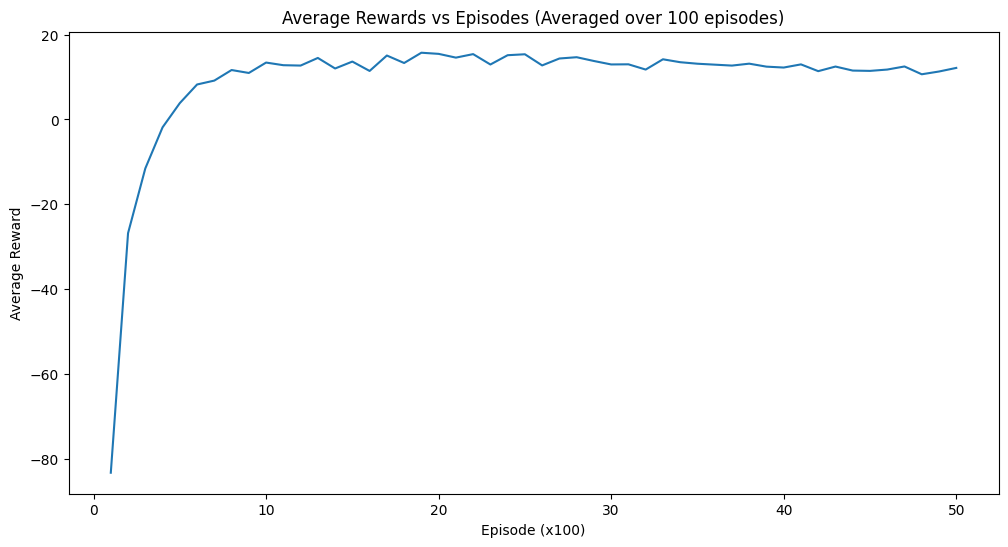

In [149]:
TAU = 0.005
class DQNAgent:
    def __init__(self, env, lr=0.0001, gamma=0.99, epsilon=1.0, epsilon_min=0.05, epsilon_decay=0.995, batch_size=32, memory_size=10000):
        self.env = env
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.batch_size = batch_size

        self.memory = collections.deque(maxlen=memory_size)  # Experience Replay Buffer

        self.policy_net = DQN(input_dim=env.observation_space.shape[0], output_dim=env.action_space.n)
        self.target_net = DQN(input_dim=env.observation_space.shape[0], output_dim=env.action_space.n)
        self.target_net.load_state_dict(self.policy_net.state_dict())

        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=lr)
        self.loss_fn = nn.MSELoss()

    def get_action(self, state):
        if random.random() < self.epsilon:
            return self.env.action_space.sample()  # Explore
        state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)  # Add batch dimension
        with torch.no_grad():
            q_values = self.policy_net(state)
        return torch.argmax(q_values).item()  # Exploit

    def store_experience(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def train_step(self):
        if len(self.memory) < self.batch_size:
            return  # Skip training if not enough samples

        batch = random.sample(self.memory, self.batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        states = torch.tensor(np.array(states), dtype=torch.float32)
        actions = torch.tensor(actions, dtype=torch.int64).unsqueeze(1)
        rewards = torch.tensor(rewards, dtype=torch.float32)
        next_states = torch.tensor(np.array(next_states), dtype=torch.float32)
        dones = torch.tensor(dones, dtype=torch.float32)

        # Compute Q-values
        q_values = self.policy_net(states).gather(1, actions).squeeze()

        # Compute target Q-values
        with torch.no_grad():
            next_q_values = self.target_net(next_states).max(1)[0]
            target_q_values = rewards + (1 - dones) * self.gamma * next_q_values

        # Compute loss
        loss = self.loss_fn(q_values, target_q_values)

        # Backpropagation
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def train(self, num_episodes=1000):
        rewards = []
        for episode in range(num_episodes):
            state = self.env.reset()
            total_reward = 0
            done = False
            while not done:
                if self.env.current_player == 2:
                    action = self.get_action(state)  # AI chooses action
                    next_state, reward, done, _ = self.env.step(action)  # Take action
                    self.store_experience(state, action, reward, next_state, done)
                    self.train_step()  # Update model
                    state = next_state
                    total_reward += reward
                    # print(reward)

                elif self.env.current_player == 1:
                    action = self.env.action_space.sample()  # Opponent chooses random action
                    next_state, reward, done, _ = self.env.step(action)  # Take action
                    state = next_state
                    total_reward -= max(0, reward)
                    # print(reward)

            # Decay epsilon for exploration-exploitation trade-off
            self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

            print(f"Episode {episode + 1}: Total Reward = {total_reward}")
            rewards.append(total_reward)

            target_net_state_dict = self.target_net.state_dict()
            policy_net_state_dict = self.policy_net.state_dict()
            for key in policy_net_state_dict:
                target_net_state_dict[key] = policy_net_state_dict[key]*TAU + target_net_state_dict[key]*(1-TAU)
            self.target_net.load_state_dict(target_net_state_dict)
        
        plot_avg(rewards=rewards, episode=100)
    
    def get_sorted_actions_with_scores(self, state):
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)  # Add batch dimension
        with torch.no_grad():
            q_values = self.model(state_tensor).squeeze().numpy()  # Get Q-values for each action

        # Create a list of (action, q_value) pairs
        actions_with_scores = [(i, q_value) for i, q_value in enumerate(q_values)]

        # Sort the actions based on their Q-values in descending order (better actions first)
        sorted_actions = sorted(actions_with_scores, key=lambda x: x[1], reverse=True)

        return sorted_actions


# Create Environment
env = DotsAndBoxesEnv()

# Train the Agent
agent = DQNAgent(env)
agent.train(num_episodes=5000)



# Evaluate the Trained Model

In [150]:
def evaluate_agent(agent, env, num_episodes=10):
    total_rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        total_reward = 0
        while not done:
            if env.current_player == 2:
            # Get the action from the trained agent
                action = agent.get_action(state)
                next_state, reward, done, _ = env.step(action)  # Take action in the environment
                state = next_state
                total_reward += reward
                # print(reward)
            
            if env.current_player == 1:
                action = env.action_space.sample()  # Opponent chooses random action
                next_state, reward, done, _ = env.step(action)  # Take action
                state = next_state
                total_reward -= reward
                # print(reward)
        
        total_rewards.append(total_reward)
        print(f"Episode {episode + 1}: Total Reward = {total_reward}")

    average_reward = np.mean(total_rewards)
    print(f"Average Reward over {num_episodes} episodes: {average_reward}")

# Evaluate the trained agent
evaluate_agent(agent, env, num_episodes=10)


Episode 1: Total Reward = 62.9
Episode 2: Total Reward = -56.1
Episode 3: Total Reward = 257.0
Episode 4: Total Reward = 40.0
Episode 5: Total Reward = -77.0
Episode 6: Total Reward = 331.0
Episode 7: Total Reward = 119.0
Episode 8: Total Reward = 290.0
Episode 9: Total Reward = 43.9
Episode 10: Total Reward = 66.9
Average Reward over 10 episodes: 107.75999999999999


In [151]:
# Save the trained model
torch.save(agent.policy_net.state_dict(), "../ai-server/model/dots_and_boxes_dqn_model_final.pth")
print("Model saved successfully!")


Model saved successfully!


In [152]:
# Load the trained model
model = DQN(input_dim=env.observation_space.shape[0], output_dim=env.action_space.n)
model.load_state_dict(torch.load("../ai-server/model/dots_and_boxes_dqn_model_final.pth"))
model.eval()  # Set the model to evaluation mode
print("Model loaded successfully!")


Model loaded successfully!


In [153]:
def get_sorted_best_actions(state, model):
    # Convert the state to a tensor
    state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)  # Add batch dimension
    
    # Pass the state through the DQN model to get Q-values for all actions
    with torch.no_grad():
        q_values = model(state_tensor).squeeze().numpy()  # Get Q-values for each action

    # Create a list of (action, q_value) pairs
    actions_with_scores = [(i, q_value) for i, q_value in enumerate(q_values)]

    # Sort actions based on Q-values in descending order (best actions first)
    sorted_actions = sorted(actions_with_scores, key=lambda x: x[1], reverse=True)

    return sorted_actions

def get_best_valid_action(state, model):
    actions = get_sorted_best_actions(state=state, model=model)
    bestMove = next((i for i, q_val in actions if state[i] == 0), None)
    return bestMove


In [154]:
def get_model_action(state, model):
    return get_best_valid_action(state=state, model=model)

def test_agent(agent, env, num_episodes=1):
    total_rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        total_reward = 0
        while not done:
            if env.current_player == 2:
            # Get the action from the trained agent
                action = get_model_action(state, model=model)
                print("player 2 -> ", sorted(list(env.state.keys()))[action])
                next_state, reward, done, _ = env.step(action)  # Take action in the environment
                state = next_state
                total_reward += reward
                if reward == -10:
                    break
                print(reward)
            
            if env.current_player == 1:
                action = env.action_space.sample()  # Opponent chooses random action
                print("player 1 -> ", sorted(list(env.state.keys()))[action])
                next_state, reward, done, _ = env.step(action)  # Take action
                state = next_state
                total_reward -= reward
                print(reward)
        
        total_rewards.append(total_reward)
        print(f"Episode {episode + 1}: Total Reward = {total_reward}")

    average_reward = np.mean(total_rewards)
    print(f"Average Reward over {num_episodes} episodes: {average_reward}")

# Evaluate the trained agent
test_agent(agent, env, num_episodes=1)


player 1 ->  v-0-0
0.1
player 2 ->  h-2-3
0.1
player 1 ->  h-2-1
0.1
player 2 ->  h-1-3
0.1
player 1 ->  h-3-1
0.1
player 2 ->  v-2-2
0.1
player 1 ->  h-0-0
0.1
player 2 ->  v-3-2
0.1
player 1 ->  v-5-3
0.1
player 2 ->  h-2-2
1
player 2 ->  h-1-2
0.1
player 1 ->  h-4-2
0.1
player 2 ->  v-2-1
0.1
player 1 ->  v-4-0
0.1
player 2 ->  v-3-1
1
player 2 ->  v-4-1
0.1
player 1 ->  h-0-5
0.1
player 2 ->  h-3-2
1
player 2 ->  v-2-3
0.1
player 1 ->  h-2-4
0.1
player 2 ->  v-3-3
1
player 2 ->  h-3-3
0.1
player 1 ->  h-3-0
0.1
player 2 ->  v-4-2
1
player 2 ->  v-3-0
1
player 2 ->  v-2-0
0.1
player 1 ->  h-1-0
0.1
player 2 ->  h-2-0
1
player 2 ->  v-5-1
0.1
player 1 ->  h-0-1
0.1
player 2 ->  h-4-1
1
player 2 ->  v-1-0
1
player 2 ->  h-1-1
1
player 2 ->  v-1-1
1
player 2 ->  v-4-3
0.1
player 1 ->  h-0-2
0.1
player 2 ->  h-4-3
0.1
player 1 ->  v-5-1
-1
player 1 ->  v-5-3
-1
player 1 ->  v-5-0
0.1
player 2 ->  h-4-0
1
player 2 ->  h-3-4
1
player 2 ->  h-4-4
1
player 2 ->  h-0-4
0.1
player 1 ->  h-4-2